In [ ]:
import numpy as np

class LinearRegression_L1Loss:
    def __init__(self,learning_rate=0.01,epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self,X,Y):
        X = np.asarray(X,dtype=np.float64)
        Y = np.asarray(Y,dtype=np.float64).reshape(-1,1)

        num_samples,num_features = X.shape
        self.weights = np.zeros((num_features,1))
        self.bias = 0

        for epoch in range(self.epochs):
            y_pred = np.dot(X,self.weights) + self.bias

            dw = (1/num_samples) * (X.T @ np.sign(y_pred - Y)) 
            db = (1/num_samples) * np.sum(np.sign(y_pred - Y))

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            self.calculate_loss(y_pred,Y)

        return self

    def calculate_loss(self,y_pred,y_true):
        return np.mean(np.abs(y_pred - y_true))   

    def predict(self,X):
        X = np.asarray(X,dtype=np.float64)
        y_pred = np.dot(X,self.weights) + self.bias
        return y_pred     
    

np.random.seed(42)
X = np.random.randn(200,3)
Y = np.random.randn(200,1)

model = LinearRegression_L1Loss()
model.fit(X,Y)

model.predict(X[:20])

In [9]:
import numpy as np

np.random.seed(42)
x = np.random.randn(100,4)
y = np.random.randn(100,1)

In [ ]:
x_train = x[:76]
y_train = y[:76]

x_test = x[76:]
y_test = y[76:]

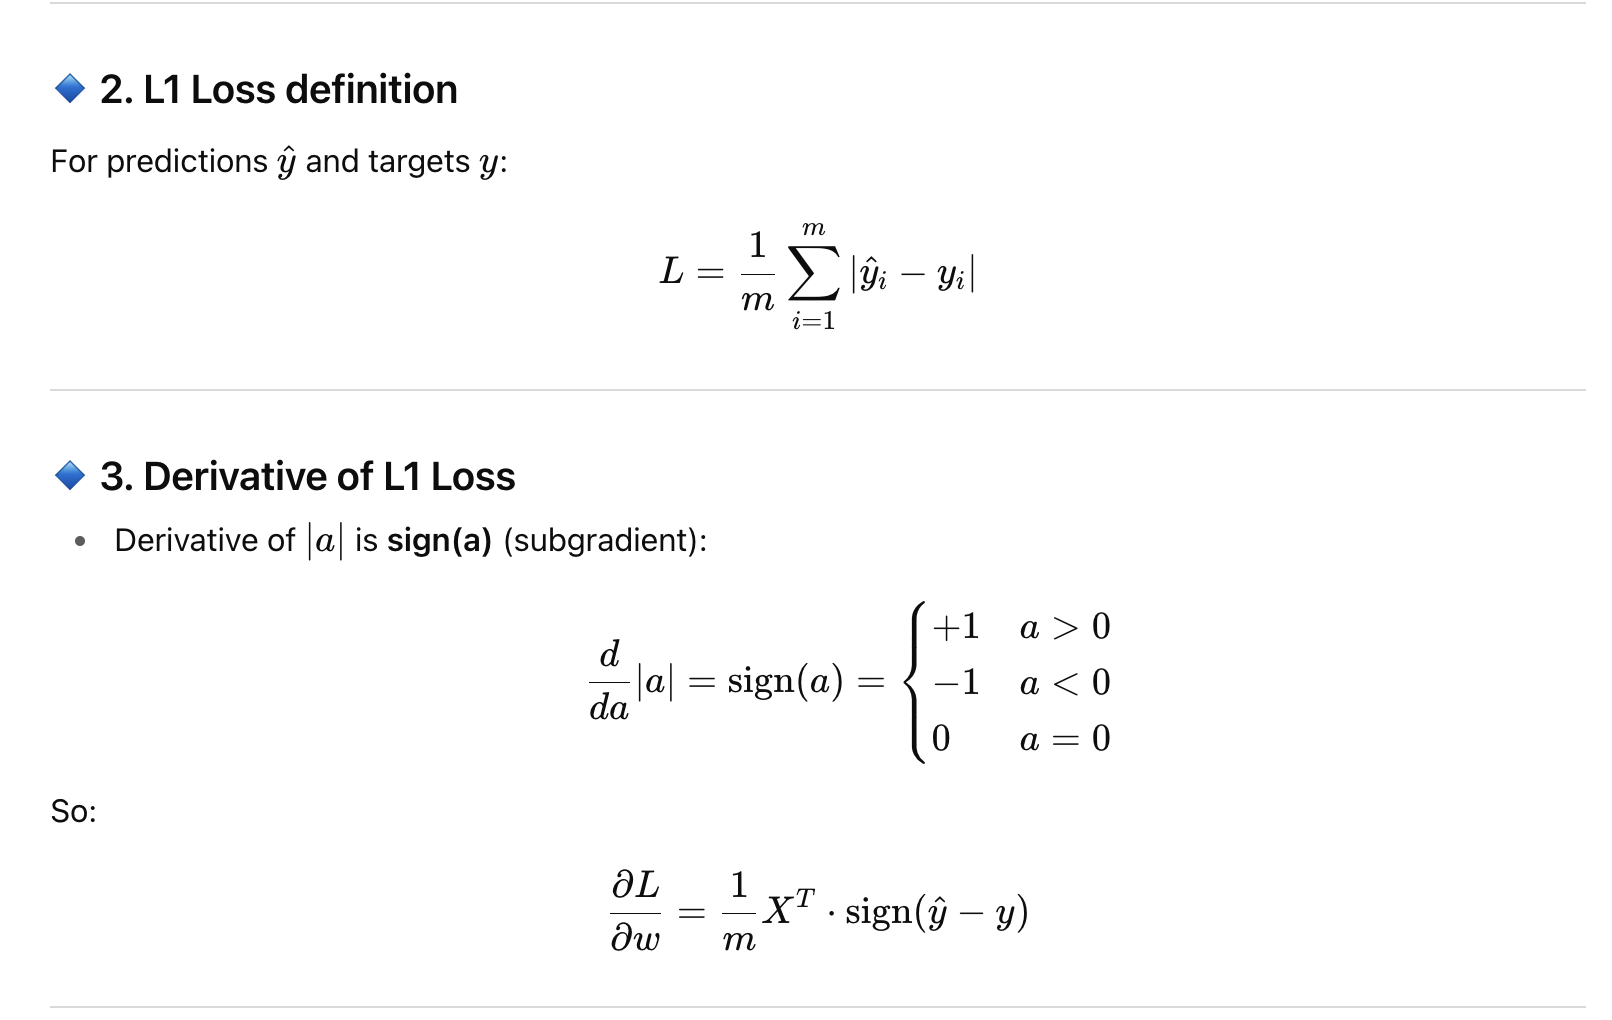

In [34]:
class LinearRegressionL1Loss:
    def __init__(self,learning_rate=0.01,epochs=1000,verbose=False,tol=1e-8):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.verbose = verbose
        self.early_stopping = tol
        self.loss_history = []

    def add_bias(self,X):
        return np.hstack((np.ones((X.shape[0],1)),X))  

    def predict_raw(self,X):
        return X @ self.weights  
    
    def calculate_loss(self,X,Y):
        preds = self.predict_raw(X)
        return np.mean(np.abs(preds - Y))

    def fit(self,X,Y):
        X = np.asarray(X,dtype=np.float64)
        Y = np.asarray(Y,dtype=np.float64).reshape((-1,1))    

        X = self.add_bias(X)

        m,n = X.shape

        # Initializing weights
        self.weights = np.zeros((n,1)) #Column vector
   
        prev_loss = float("inf")
        for epoch in range(self.epochs):
            preds = self.predict_raw(X)

            gradients = (X.T @ np.sign(preds - Y))/m # Look at the picture attached above for the gradient of L1 Loss.

            self.weights -= self.learning_rate * gradients

            loss = self.calculate_loss(X,Y)
            self.loss_history.append(loss)

            # if np.abs(prev_loss - loss) < self.early_stopping:
            #     break
            prev_loss = loss

            if self.verbose and epoch % 100 == 0:
                print(f"Epoch: {epoch} and loss: {loss}")

        return self

    def predict(self,X_test):
        X = np.asarray(X_test,dtype=np.float64)
        X = self.add_bias(X)
        return self.predict_raw(X)
    
    def score(self,preds,Y):
        m = Y.shape[0]
        return np.sqrt(np.sum((preds - Y) ** 2)/m)

In [35]:
model = LinearRegressionL1Loss()
model.fit(x_train,y_train)

predictions = model.predict(x_test)
rmse = model.score(predictions,y_test)

In [36]:
print(predictions)

[[-2.49255443e-01]
 [ 6.56236754e-02]
 [-2.31585646e-01]
 [ 1.72667432e-01]
 [-9.44751674e-02]
 [-2.18327329e-01]
 [-3.84968340e-01]
 [ 1.55320064e-01]
 [-1.53392439e-01]
 [-9.70416773e-02]
 [ 2.93378971e-03]
 [ 1.77140676e-02]
 [-2.87055983e-01]
 [ 1.39502853e-02]
 [-4.13748274e-02]
 [ 1.96095300e-01]
 [-1.32478557e-01]
 [-2.87512019e-01]
 [ 3.47649861e-01]
 [ 1.77674774e-01]
 [-2.88364421e-01]
 [-2.54467058e-01]
 [-2.66693639e-01]
 [ 3.52166834e-01]
 [ 2.54488013e-05]]


In [37]:
print(rmse)

1.13136272364041


In [ ]:
# This is a better code from scratch.
import numpy as np

class LinearRegressionL1:
    def __init__(self, lr: float = 0.01, n_iters: int = 1000) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape   # X shape [N, f]
        self.weights = np.random.randn(num_features) * 0.01  # W shape [f]
        self.bias = 0

        for i in range(self.n_iters):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias  # [N]

            # Gradients (L1 loss)
            residual_sign = np.sign(y_pred - y)           # [N]
            dw = (1 / num_samples) * np.dot(X.T, residual_sign)  # [f]
            db = (1 / num_samples) * np.sum(residual_sign)       # scalar

            # Update
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        return self

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [ ]:
import numpy as np

class LinearRegression_L1Loss:
    def __init__(self,learning_rate=0.01,epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self,X,Y):
        X = np.asarray(X,dtype=np.float64)
        Y = np.asarray(Y,dtype=np.float64).reshape(-1,1)

        num_samples,num_features = X.shape
        self.weights = np.zeros((num_features,1))
        self.bias = 0

        for epoch in range(self.epochs):
            y_pred = np.dot(X,self.weights) + self.bias

            dw = (1/num_samples) * (X.T @ np.sign(y_pred - Y)) 
            db = (1/num_samples) * np.sum(np.sign(y_pred - Y))

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            self.calculate_loss(y_pred,Y)

        return self

    def calculate_loss(self,y_pred,y_true):
        return np.mean(np.abs(y_pred - y_true))   

    def predict(self,X):
        X = np.asarray(X,dtype=np.float64)
        y_pred = np.dot(X,self.weights) + self.bias
        return y_pred     
    

np.random.seed(42)
X = np.random.randn(200,3)
Y = np.random.randn(200,1)

model = LinearRegression_L1Loss()
model.fit(X,Y)

model.predict(X[:20])    

In [11]:
np.random.seed(42)
X = np.random.randn(200,3)
Y = np.random.randn(200,1)

model = LinearRegression_L1Loss()
model.fit(X,Y)

model.predict(X[:20])

array([[ 0.11898161],
       [ 0.00048657],
       [ 0.10425188],
       [-0.04301213],
       [-0.36231468],
       [-0.01807618],
       [ 0.0575719 ],
       [-0.06850547],
       [-0.02995618],
       [-0.04023621],
       [ 0.31804263],
       [ 0.06042004],
       [-0.32540428],
       [ 0.18474325],
       [-0.12321909],
       [ 0.13482214],
       [-0.12428982],
       [ 0.05530402],
       [ 0.09196437],
       [ 0.22395702]])

In [5]:
print(Y[:20])

[[ 0.75698862]
 [-0.92216532]
 [ 0.86960592]
 [ 1.35563786]
 [ 0.4134349 ]
 [ 1.87679581]
 [-0.7737892 ]
 [-1.2446547 ]
 [-1.77872025]
 [ 1.49604431]
 [ 0.65436566]
 [-0.05558467]
 [ 0.27996863]
 [-1.12548905]
 [ 2.44575198]
 [ 0.12922118]
 [ 0.10939479]
 [ 0.72576662]
 [ 0.48100923]
 [ 0.22388402]]
